In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

def generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi,
                          steps, Npaths, return_vol=False):
    dt = T/steps
    size = (Npaths, steps)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S
    v_t = v_0
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0, 0]),
                                           cov=np.array([[1, rho],
                                                         [rho, 1]]),
                                           size=Npaths) * np.sqrt(dt)

        S_t = S_t*(np.exp((r - 0.5*v_t)*dt + np.sqrt(v_t) * WT[:, 0]))
        v_t = v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:, 1]
        prices[:, t] = S_t
        sigs[:, t] = v_t

    if return_vol:
        return prices, sigs

    return prices


C:\Users\barna\AppData\Local\Temp\ipykernel_17780\3056478960.py:19: RuntimeWarning: invalid value encountered in sqrt
  S_t = S_t*(np.exp((r - 0.5*v_t)*dt + np.sqrt(v_t) * WT[:, 0]))
C:\Users\barna\AppData\Local\Temp\ipykernel_17780\3056478960.py:20: RuntimeWarning: invalid value encountered in sqrt
  v_t = v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:, 1]


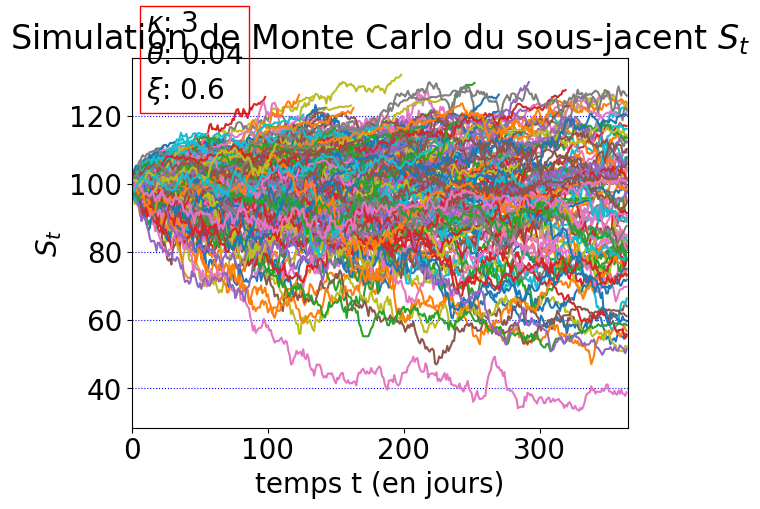

In [46]:
kappa = 3
theta = 0.04
v_0 = 0.04
xi = 0.6
r = 0.05
S = 100
paths = 300
steps = 365
T = 1
rho = -0.8
prices, sigs = generate_heston_paths(S, T, r, kappa, theta,
                                     v_0, rho, xi, steps, paths,
                                     return_vol=True)


plt.plot(prices.T)
plt.title('Simulation de Monte Carlo du sous-jacent $S_t$')
plt.xlabel('temps t (en jours)')
plt.ylabel('$S_t$')
plt.text(10, 125, f'$\kappa$: {kappa}\n$\\theta$: {theta}\n$\\xi$: {xi}',
         bbox=dict(facecolor='none', edgecolor='red'))
plt.grid(axis='y', linestyle='dotted', color='blue')
plt.xlim((0,365))
# plt.figure(figsize=(7, 6))
# plt.plot(np.sqrt(sigs).T)
# plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
# plt.title('Heston Stochastic Vol Simulation')
# plt.xlabel('temps t (en jours)')
# plt.ylabel('Volatilité')
# plt.legend(fontsize=15)
plt.show()
